In [ ]:
from google.colab import drive
import tarfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the tar.gz file
zip_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_movie_review/data/aclImdb_v1.tar.gz"

# Extract the tar.gz file
with tarfile.open(zip_path, 'r:gz') as tar_ref:
    tar_ref.extractall("/content/dataset")

print("Extraction complete!")

dataset_dir = os.path.join("/content/dataset", 'aclImdb')
os.listdir(dataset_dir)

train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)
print('----------------')
test_dir = os.path.join(dataset_dir,'test')
os.listdir(test_dir)

# Google Collab commands
# !pip install bs4
# !lscpu


Mounted at /content/drive
Extraction complete!
----------------
Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.44
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
 

# Topic: Train Bert models with movie reviews
Step 1: Brief description of the problem and data \
1. The dataset is from http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz. It is a collection of movie reviews from Imdb. The package includes the following files: \
(1) Unsupervised Bag-of-Words (BoW) features and labeledBow.feat: A labeled BoW feature representation, which is not needed for this project since we are training BERT. \
(2) IMDB URLs: Some outdated URLs that no longer work. \
(3) Training and test directories: Each containing two subdirectories that store positive and negative movie reviews separately

2. The dataset consists of 25,000 movie reviews split between the training and test sets. Each set has 12500 negative comments and 12500 positive comments. The dataset is divided evenly between positive and negative comments.
3. The project aims to train two Bert models with PyTorch and TensorFlow and examine any differences between these two models. \
(1) Bert model: \
Among a variety of Bert models, this project goes with ***bert-base-uncased*** (12 layers, 768 hidden size) for TensorFlow and ***distilbert-base-uncased*** (6 layers, 768 hidden size) for PyTorch. The main concern is the limited computational resources on Google Collab. \
(2) Hugging Face Transformer library: \
It is an open-source package that provides pretrained transformer models with a unified API for both PyTorch and TensorFlow for model loading, tokenization, training, etc. \
(3) Tokenizer algorithm in Bert(TensorFlow): \
BERT tokenization is handled using ***Hugging Face’***s transformers library, which provides a BertTokenizer or AutoTokenizer for encoding text. In this project we use BertTokenizer since we are using ***bert-base-uncased***. The tokenizer breaks words into subwords and uses a vocabulary-based approach to map tokens to integer IDs. PyTorch uses Torch tensors. \
(4) Tokenizer algorithm in Distilbert (PyTorch): \
TensorFlow can also uses Hugging Face’s transformers, so in this project we also use transformers. The tokenization process will be very similar with PyTorch, but it uses TF tensors. We go with a general tokenizer *AutoTokenizer* and a light-weighted model ***distilbert-base-uncased***

  The purpose of this project is to measure the maximum param this assigned CPU (Intel(R) Xeon(R) CPU @ 2.20GHz) can take and if differences exist between ***bert-base-uncased*** and ***distilbert-base-uncased*** in regard of time consumption, CPU and memory usage, and accuracy.

  **Objectives**:
  1. Train two BERT models using PyTorch and TensorFlow and compare their prediction performance.
  2. Evaluate computational efficiency (CPU & memory usage) on Google Colab when making predictions under limited resources


urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
urls_unsup.txt: http://www.imdb.com/title/tt0018515/usercomments
pos: /content/dataset/aclImdb/train/pos
labeledBow.feat: 9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29:2 32:1 41:1 45:1 47:1 50:1 54:2 57:1 59:1 63:2 64:1 66:1 68:2 70:1 72:1 78:1 100:1 106:1 116:1 122:1 125:1 136:1 140:1 142:1 150:1 167:1 183:1 201:1 207:1 208:1 213:1 217:1 230:1 255:1 321:5 343:1 357:1 370:1 390:2 468:1 514:1 571:1 619:1 671:1 766:1 877:1 1057:1 1179:1 1192:1 1402:2 1416:1 1477:2 1940:1 1941:1 2096:1 2243:1 2285:1 2379:1 2934:1 2938:1 3520:1 3647:1 4938:1 5138:4 5715:1 5726:1 5731:1 5812:1 8319:1 8567:1 10480:1 14239:1 20604:1 22409:4 24551:1 47304:1
unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:

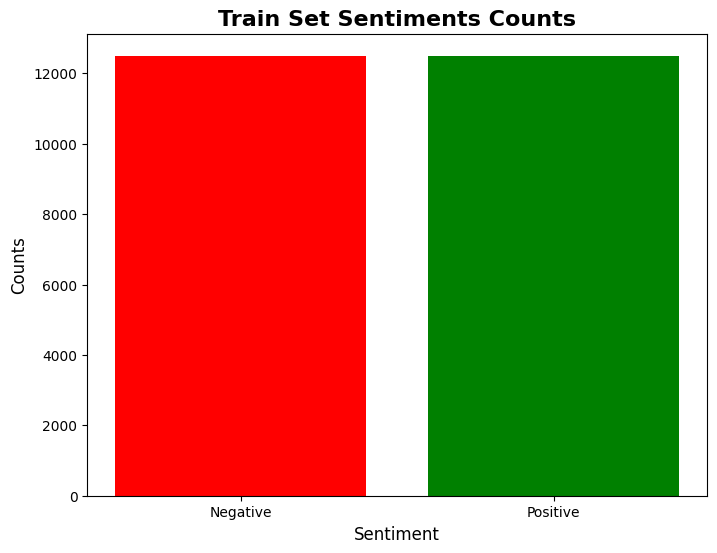

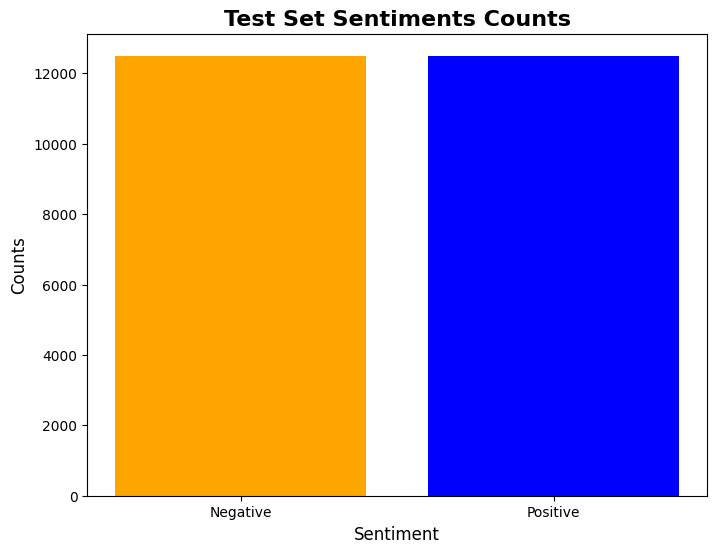

------averange length for sentences in train dataset------
sentiment
0    1302.97904
1    1347.16024
Name: text_length, dtype: float64


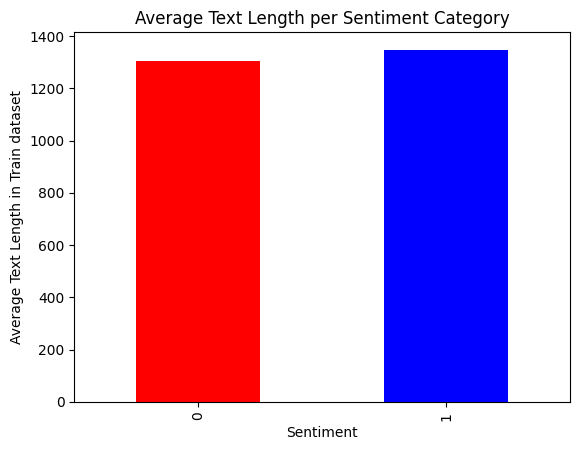

------averange length for sentences in Test dataset------
sentiment
0    1285.14968
1    1302.43512
Name: text_length, dtype: float64


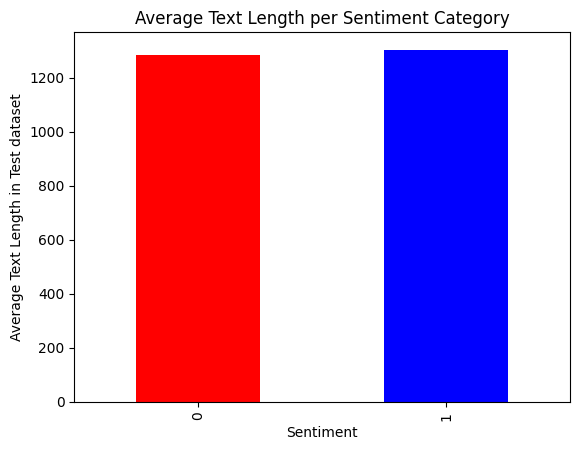

------total length for sentences in train dataset------
sentiment
0    16287238
1    16839503
Name: text_length, dtype: int64
------total length for sentences in test dataset------
sentiment
0    16064371
1    16280439
Name: text_length, dtype: int64
           min    max        mean
sentiment                        
0           52   8969  1302.97904
1           70  13704  1347.16024


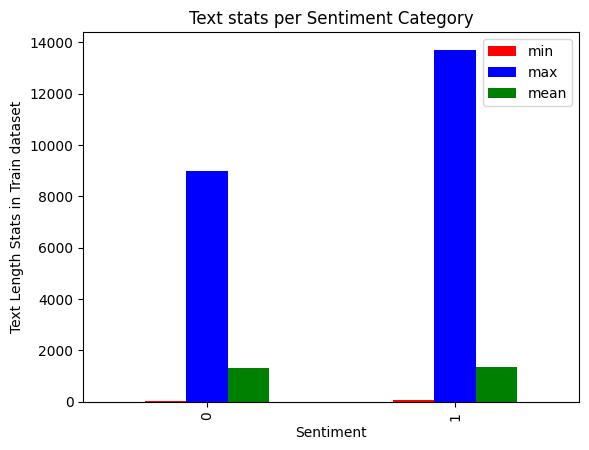

           min    max        mean
sentiment                        
0           32   6385  1285.14968
1           65  12988  1302.43512


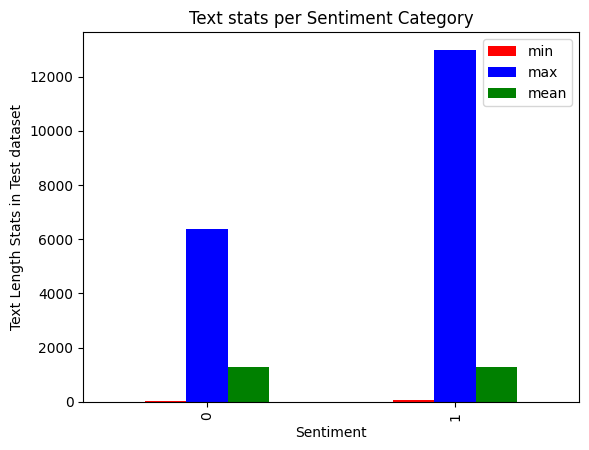

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

for file in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file)
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            first_value = f.readline().strip()
            print(f"{file}: {first_value}")
    else:
        print(f"{file}: {file_path}")

for file in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file)
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            first_value = f.readline().strip()
            print(f"{file}: {first_value}")
    else:
        print(f"{file}: {file_path}")

def load_dataset(directory):
    data = {"sentence": [], "sentiment": []}
    for file_name in os.listdir(directory):
        print(file_name)
        if file_name == 'pos':
            positive_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(positive_dir):
                text = os.path.join(positive_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(1)
        elif file_name == 'neg':
            negative_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(negative_dir):
                text = os.path.join(negative_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(0)

    return pd.DataFrame.from_dict(data)

train_df = load_dataset(train_dir)
print('----------------')
print(train_df.head())
print(train_df.tail())
print('----------------')
test_df = load_dataset(test_dir)
print(test_df.head())
print(test_df.tail())

sentiment_counts = train_df['sentiment'].value_counts()
print("Train sentiment total counts:",sentiment_counts)
sentiment_labels = {0: 'Negative', 1: 'Positive'}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sentiment_labels.values(), sentiment_counts.values, color=['red', 'green'])
ax.set_title('Train Set Sentiments Counts', fontsize=16, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
print('----------------')

sentiment_counts = test_df['sentiment'].value_counts()
print("Test sentiment total counts:",sentiment_counts)
sentiment_labels = {0: 'Negative', 1: 'Positive'}
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sentiment_labels.values(), sentiment_counts.values, color=['orange', 'blue'])
ax.set_title('Test Set Sentiments Counts', fontsize=16, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
plt.show()

# show text length
train_df['text_length'] = train_df['sentence'].apply(lambda x: len(str(x)))
average_length_per_sentiment = train_df.groupby('sentiment')['text_length'].mean()
print('------averange length for sentences in train dataset------')
print(average_length_per_sentiment)

average_length_per_sentiment.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Average Text Length in Train dataset')
plt.title('Average Text Length per Sentiment Category')
plt.show()

test_df['text_length'] = test_df['sentence'].apply(lambda x: len(str(x)))
average_length_per_sentiment = test_df.groupby('sentiment')['text_length'].mean()
print('------averange length for sentences in Test dataset------')
print(average_length_per_sentiment)

average_length_per_sentiment.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Average Text Length in Test dataset')
plt.title('Average Text Length per Sentiment Category')
plt.show()

total_length_per_sentiment = train_df.groupby('sentiment')['text_length'].sum()
print('------total length for sentences in train dataset------')
print(total_length_per_sentiment)

total_length_per_sentiment = test_df.groupby('sentiment')['text_length'].sum()
print('------total length for sentences in test dataset------')
print(total_length_per_sentiment)

length_stats = train_df.groupby('sentiment')['text_length'].agg(['min', 'max', 'mean'])
print(length_stats)

length_stats.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Text Length Stats in Train dataset')
plt.title('Text stats per Sentiment Category')
plt.show()

length_stats = test_df.groupby('sentiment')['text_length'].agg(['min', 'max', 'mean'])
print(length_stats)
length_stats.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Text Length Stats in Test dataset')
plt.title('Text stats per Sentiment Category')
plt.show()





Step 2: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data \
1. Use BeautifulSoup to parse text data from webpages, specifically IMDb reviews.
2. Older BERT models require special tokens like [CLS], but Hugging Face handles this automatically.
3. In the training dataset, the average sentence length is 1,302 for Sentiment 0 and 1,347 for Sentiment 1, indicating that Sentiment 1 texts tend to be slightly longer. In the test dataset, the average sentence length is 1,285 for Sentiment 0 and 1,302 for Sentiment 1, showing a similar pattern. Negative comments (Sentiment 0) tend to be shorter in the test dataset. Overall, text lengths in the test dataset are slightly shorter than in the training dataset.
4. In the training set, sentiment 0 sentences range from 52 to 8,969 characters, with an average length of 1,302.98, while sentiment 1 sentences range from 70 to 13,704 characters, averaging 1,347.16.
5. The overall distribution suggests that sentiment 1 sentences tend to be slightly longer on average than sentiment 0 sentences in both datasets, with greater variance in the training set.
6. After running Word Cloud, here are words that stand out: \
(1) Postive words in the training set: story, good, time, great, show, really, love, much \
(2) Postive words in the testing set: story, time, great, show, really, way, watch, scene \
(3) Negative words in the training set: even, time, much, way, really, story, bad, good, look \
(4) Negative words in the testing set: even, time, good, bad, show, story 

Since many words are shared between positive and negative categories, distinguishing sentiment requires more than just word presence. Checking word combinations and phrase structures is crucial for accurate classification. Some confusing comments—such as a seemingly negative remark like "The story would have been enhanced" appearing in positive reviews or a seemingly positive statement like "Eddie Murphy is a great comic" appearing in a negative review—also need to be identified to improve accuracy.

Train Dataset saved at: /content/drive/MyDrive/Colab Notebooks/deep_learning_movie_review/data/train_df.csv


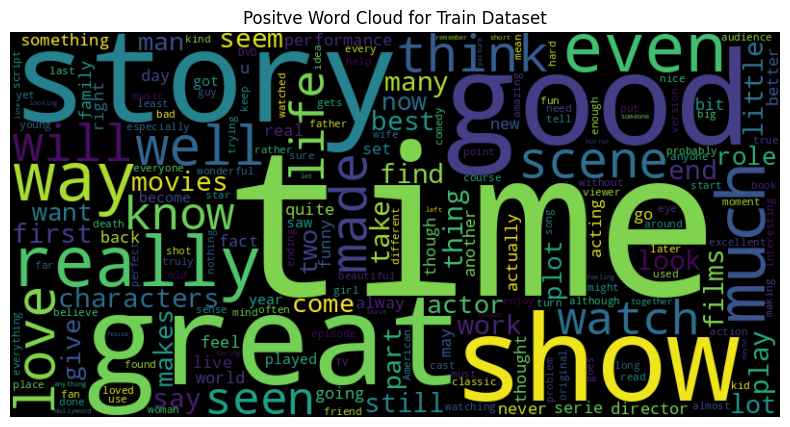

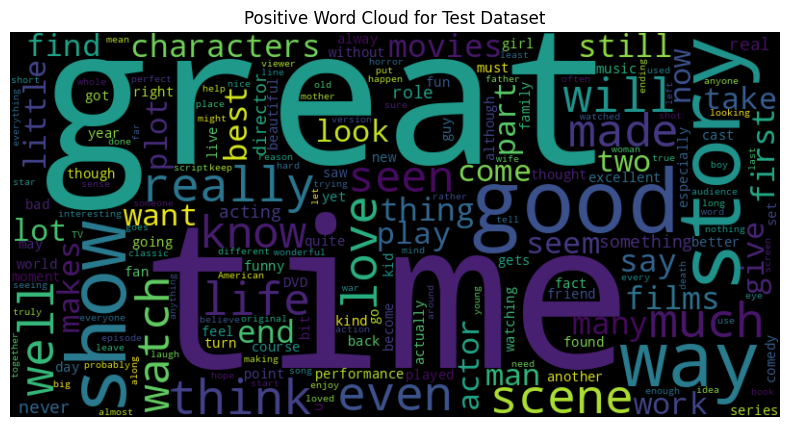

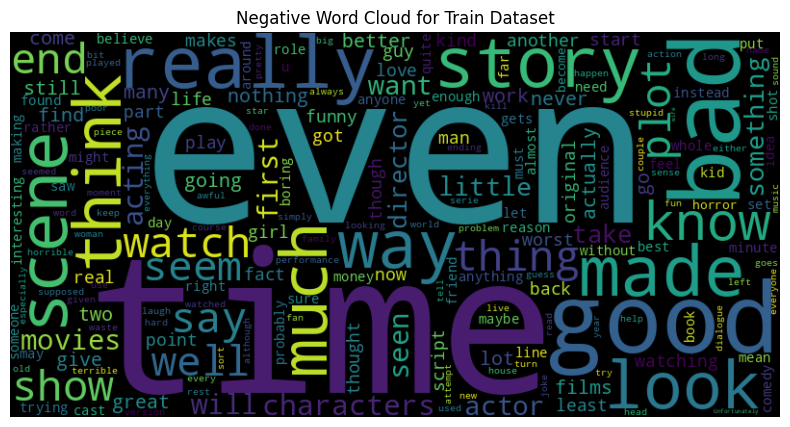

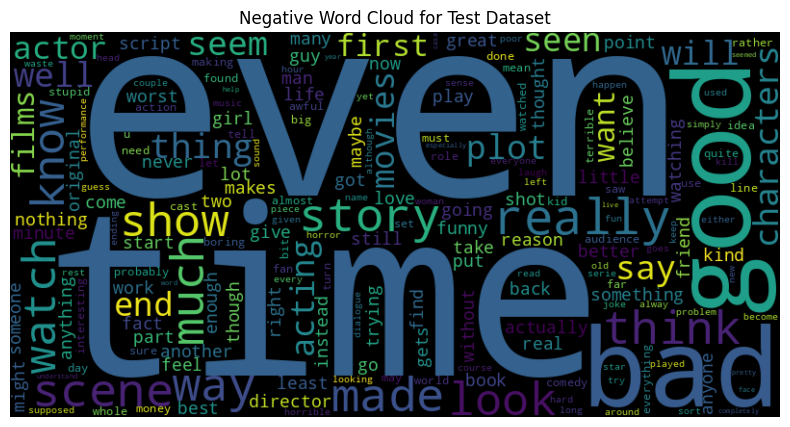

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re

def text_cleaning(text):
    soup = BeautifulSoup(text, "html.parser")
    text = re.sub(r'\[[^]]*\]', '', soup.get_text())
    pattern = r"[^a-zA-Z0-9\s,']"
    text = re.sub(pattern, '', text)
    return text


train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()

test_df['Cleaned_sentence'] = test_df['sentence'].apply(text_cleaning)

train_df_save_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_movie_review/data/train_df.csv"
train_df.to_csv(train_df_save_path, index=False)

test_df_save_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_movie_review/data/test_df.csv"
test_df.to_csv(test_df_save_path, index=False)

def generate_wordcloud(text, Title, custom_stopwords=None):
    all_text = " ".join(text)


    stop_words = set(STOPWORDS)
    if custom_stopwords:
        stop_words.update(custom_stopwords)  # Add custom stopwords

    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=stop_words,
                          background_color='black').generate(all_text)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

custom_words = {'film', 'movie', 'said', 'people', 'see', 'one', 'character','make'}

generate_wordcloud(train_df[train_df['sentiment'] == 1]['Cleaned_sentence'].dropna(), 'Positve Word Cloud for Train Dataset', custom_words)
generate_wordcloud(test_df[train_df['sentiment'] == 1]['Cleaned_sentence'].dropna(), 'Positive Word Cloud for Test Dataset', custom_words)
generate_wordcloud(train_df[train_df['sentiment'] == 0]['Cleaned_sentence'].dropna(), 'Negative Word Cloud for Train Dataset', custom_words)
generate_wordcloud(test_df[train_df['sentiment'] == 0]['Cleaned_sentence'].dropna(), 'Negative Word Cloud for Test Dataset', custom_words)





Step 3: Model Architecture \
Due to dependency conflicts, the model architecture and results for DistilBERT & PyTorch can be found in [Final_movie_review_pytorch.ipynb](./final_movie_review_pytorch.ipynb), while the model architecture and results for BERT & TensorFlow are available in [Final_movie_review_tensor_flow.ipynb](./final_movie_review_tensor_flow.ipynb).

For both models running on an Intel(R) Xeon(R) CPU @ 2.20GHz, the model crashes with a batch size of 16, so we need to reduce it. It also crashes when the max length exceeds 64, limiting us to a max length of 32. Both constraints may impact accuracy.

PyTorch and Tensor Flow:

|               | Tensor Flow                                                           | 
|----------     |----------                                                             |
| Batching      | ses batch_size internally. No need to set up                          |                 
| Data Pipeline | Uses tf.data.Dataset.batch() for efficient pipeline creation          |


_________________________________________________________________________________________


|               | PyTorch                                                               | 
|----------     |----------                                                             |
| Batching      | Explicitly requires defining batch_size during DataLoader             |            
| Data Pipeline | Uses torch.utils.data.DataLoader, allowing easy batch customization   | 




Step 4: Results and Analysis
1. To further improve classification, techniques such as fine-tuning with more negative samples, adjusting class weights, or applying threshold tuning could help reduce false positives and false negatives.
2. The training to Bert Model with TensorFlow failed.

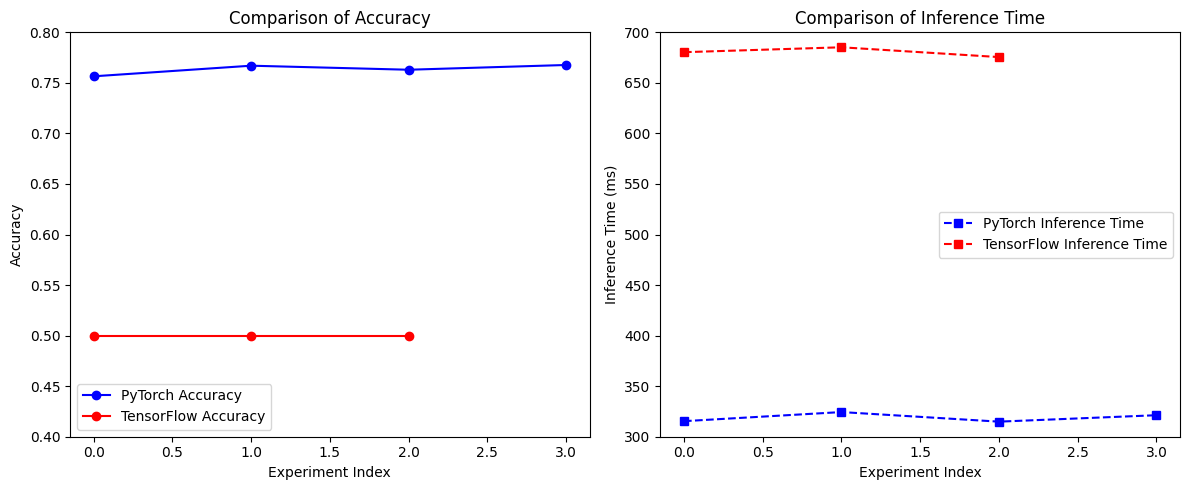

In [3]:
# accuracy and inference time
import matplotlib.pyplot as plt
import numpy as np

performance_results_py_torch = {
    "PyTorch Accuracy 1": 0.7564799785614014,
    "PyTorch Inference Time": 315.39,
    "PyTorch Accuracy 2": 0.7670400142669678,
    "PyTorch Inference Time": 324.39,
    "PyTorch Accuracy 3": 0.7630400061607361,
    "PyTorch Inference Time": 314.91,
    "PyTorch Accuracy 4": 0.7676799893379211,
    "PyTorch Inference Time": 321.27
}

performance_results_tensor_flow = {
    "TensorFlow Accuracy 1": 0.5,
    "PyTorch Inference Time 1": 680.37,
    "TensorFlow Accuracy 2": 0.5,
    "PyTorch Inference Time 2": 685.21,
    "TensorFlow Accuracy 3": 0.5,
    "PyTorch Inference Time 3": 675.53,

}

performance_accuracy = {
    "PyTorch": [0.7565, 0.7670, 0.7630, 0.7677],
    "TensorFlow": [0.5, 0.5, 0.5]
}


performance_inference_time = {
    "PyTorch": [315.39, 324.39, 314.91, 321.27],
    "TensorFlow": [680.37, 685.21, 675.53],
}

# Create two separate plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Accuracy
axes[0].plot(performance_accuracy["PyTorch"], 'bo-', label="PyTorch Accuracy")
axes[0].plot(performance_accuracy["TensorFlow"], 'ro-', label="TensorFlow Accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Experiment Index")
axes[0].set_ylim(0.4, 0.8)
axes[0].set_title("Comparison of Accuracy")
axes[0].legend()

# Plot Inference Time
axes[1].plot(performance_inference_time["PyTorch"], 'bs--', label="PyTorch Inference Time")
axes[1].plot(performance_inference_time["TensorFlow"], 'rs--', label="TensorFlow Inference Time")
axes[1].set_ylabel("Inference Time (ms)")
axes[1].set_xlabel("Experiment Index")
axes[1].set_ylim(300, 700)
axes[1].set_title("Comparison of Inference Time")
axes[1].legend()

plt.tight_layout()
plt.show()

Step 5: Conclusion and Takeaways
1. The movie review can be a mix of positive and negative words, so having higher number of max length and more computing resources is required for text analysis with longer length.
2. Accuracy:

    PyTorch's accuracy ranges from 0.7565 to 0.7677, showing stable and relatively high performance.
    TensorFlow's accuracy remains fixed at 0.5, significantly lower than PyTorch, indicating poor model performance on TensorFlow.

3. Inference Time:

    PyTorch's inference time ranges from 314.91ms to 324.39ms, making it relatively fast.
    TensorFlow's inference time is significantly longer, ranging from 675.53ms to 685.21ms—approximately twice as slow as PyTorch.

Step 6: Recommendations
1. If computing resources allowes, use max-length 128 in the full model or use GAN-BERT to increase accuracy.
2. With limited CPU sources, if the goal is to achieve high accuracy with lower inference latency, PyTorch is the better choice.
3. Modify more parameters in PyTorch
4. 

Citations: \
GeeksforGeeks. "Sentiment Classification Using BERT." GeeksforGeeks, https://www.geeksforgeeks.org/sentiment-classification-using-bert/. Accessed 25 Jan. 2025.

Hugging Face. distilbert/distilbert-base-uncased. Hugging Face, https://huggingface.co/distilbert/distilbert-base-uncased. Accessed 15 Feb. 2025.

Maas, Andrew L., et al. "Learning Word Vectors for Sentiment Analysis." Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, Association for Computational Linguistics, June 2011, pp. 142–50, Portland, Oregon, USA. http://www.aclweb.org/anthology/P11-1015.